In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rc, style

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 1234

In [7]:
# set random seed for reproducibility
np.random.seed(seed=RANDOM_SEED)
tf.random.set_seed(seed=RANDOM_SEED)

In [8]:
tf.__version__

'2.9.1'

## Tensors

In [11]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [12]:
x.numpy()

1

In [15]:
x.shape

TensorShape([])

In [18]:
tf.rank(x).numpy()

0

In [21]:
m = tf.constant([[1, 2, 3, 4], [1, 2, 3, 4]])

In [22]:
m

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 3, 4],
       [1, 2, 3, 4]])>

In [23]:
st = tf.constant(['hello', 'world', '!'])

In [24]:
st

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'hello', b'world', b'!'], dtype=object)>

In [25]:
tf.rank(st).numpy()

1

In [26]:
## Helpers
ones = tf.ones([3, 3])
print(ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [27]:
tf.zeros([2, 5])

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [28]:
tf.reshape(tf.zeros([2, 5]), [5, 2])

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [29]:
tf.transpose(tf.ones([5, 7]))

<tf.Tensor: shape=(7, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

## Tensor math

In [32]:
a = tf.constant(1)
b = tf.constant(2)

tf.add(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [33]:
a+b

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [34]:
tf.square(b)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [39]:
tf.sqrt(tf.constant(4, dtype=float))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [41]:
b*tf.constant(5)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [42]:
c = tf.constant([[1, 3], [2, 4]])
d = tf.constant([[5, 7], [6, 8]])

tf.tensordot(c, d, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23, 31],
       [34, 46]])>

## Sampling

In [45]:
normal_dist = tf.random.normal(shape=(2000, 1), mean=0, stddev=1.)

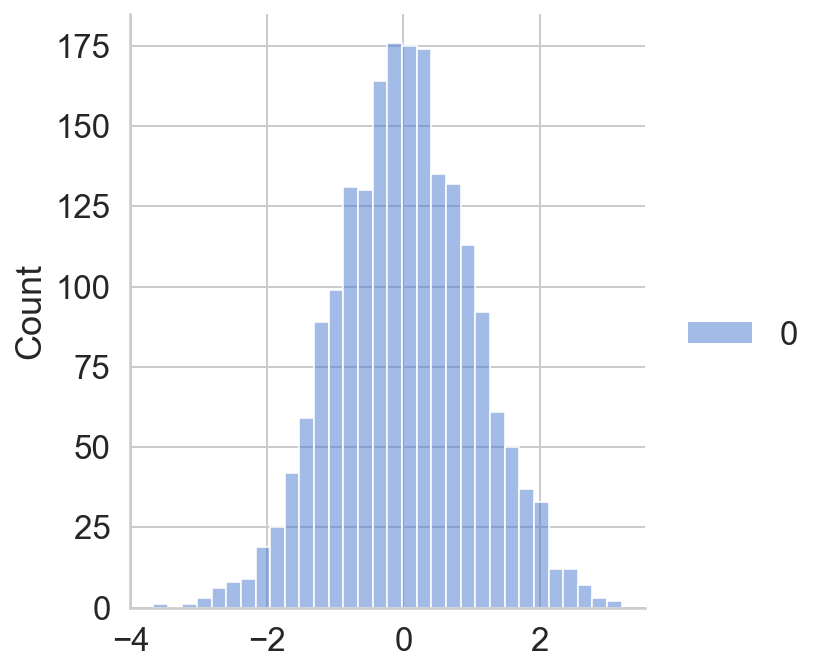

In [48]:
sns.displot(normal_dist)

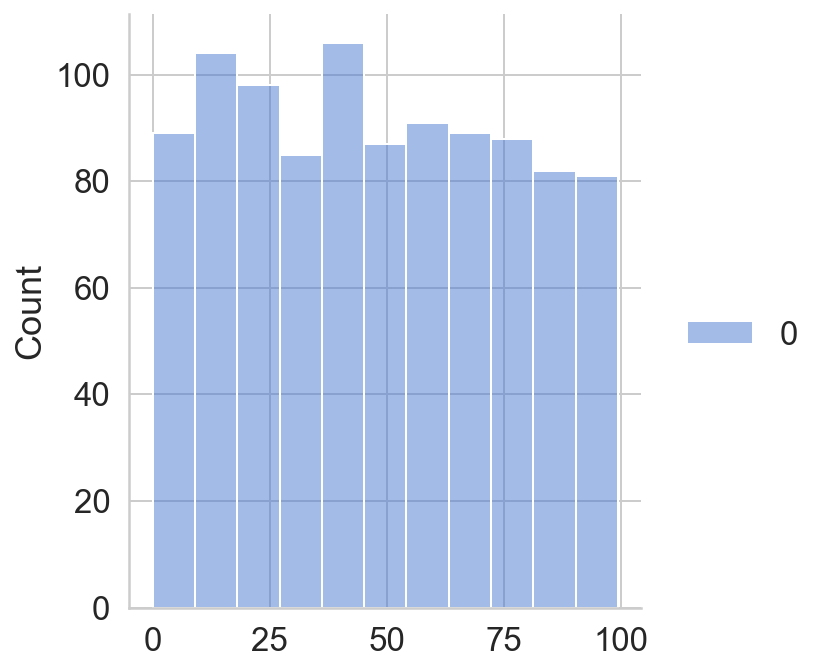

In [51]:
uniform_dist = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)
sns.displot(uniform_dist)

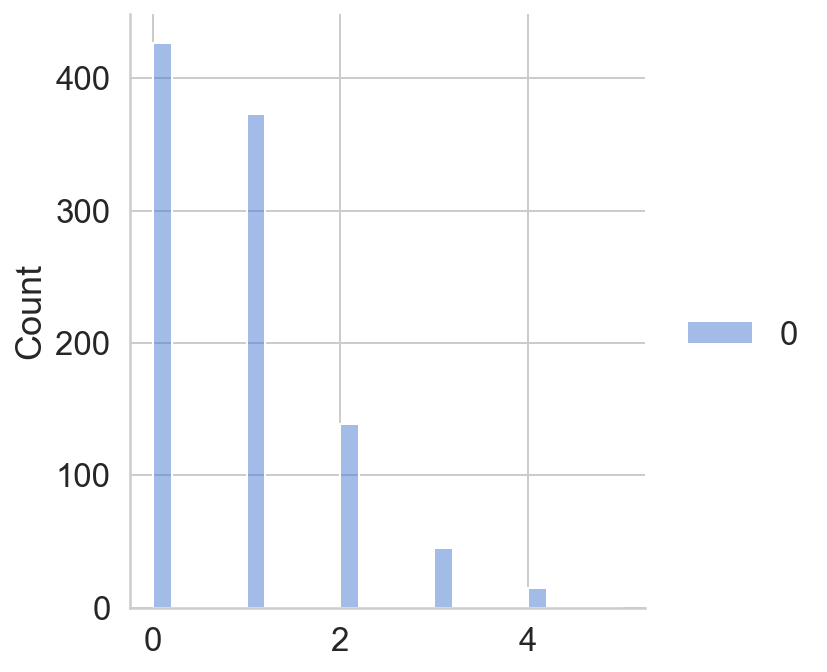

In [53]:
poisson_dist = tf.random.poisson(shape=(1000, 1), lam=0.9)
sns.displot(poisson_dist)

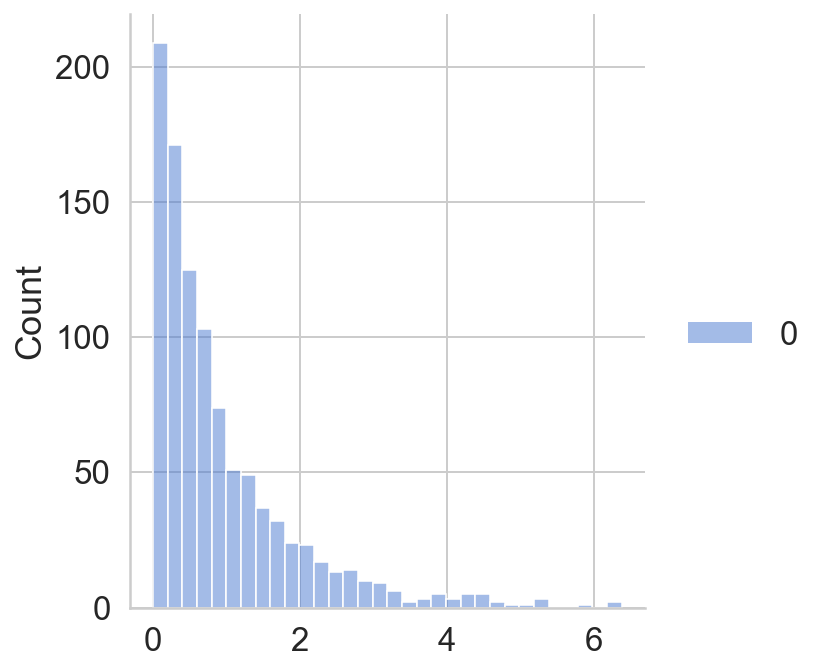

In [54]:
gamma_dist = tf.random.gamma(shape=(1000, 1), alpha=0.9)
sns.displot(gamma_dist)

In [55]:
## Linear Regression

In [60]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-20, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [61]:
# Generate random (linear) data
X, y = generate_data(num_samples=100)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         10.68466514]
 [ 1.         11.82461448]
 [ 2.         18.87468735]
 [ 3.         12.81043314]
 [ 4.         32.63346128]]


c:\Users\Akshay\Projects\deep-learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

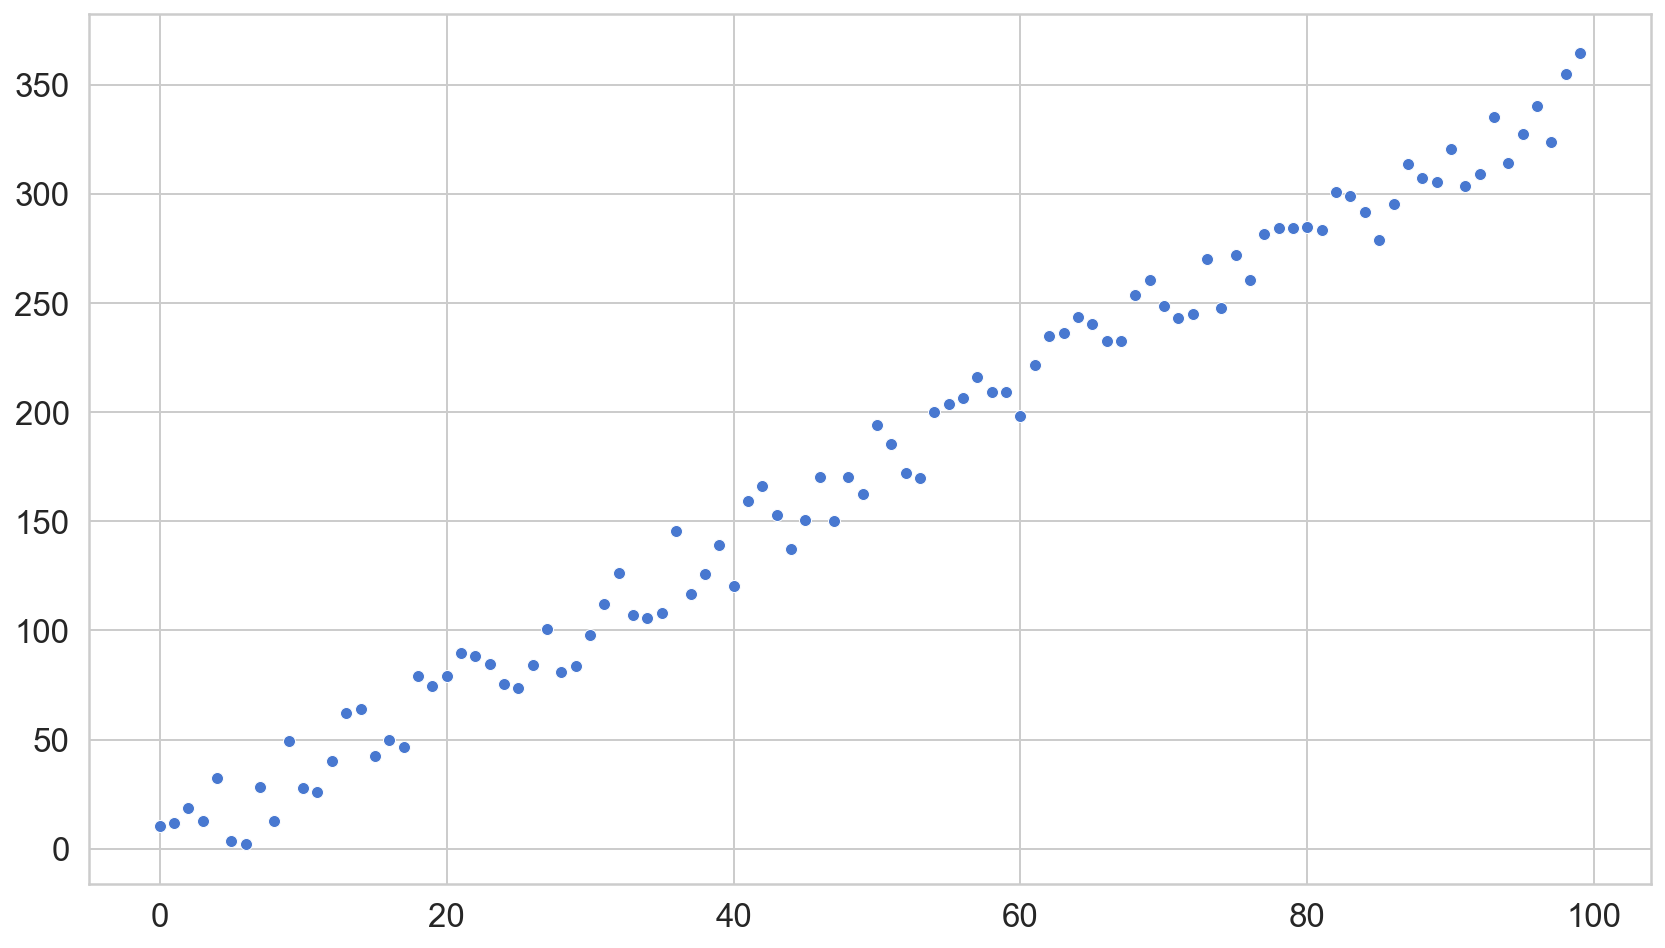

In [62]:
sns.scatterplot(X, y)

In [63]:
linear_reg_model = keras.Sequential([
    layers.Dense(1, activation='linear', input_shape=[1])
])

In [64]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [65]:
linear_reg_model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [67]:
history = linear_reg_model.fit(x=X, y=y, shuffle=True, epochs=1000, validation_split=0.2, verbose=0)

In [68]:
def plot_error(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('mean square error')
    plt.plot(hist['epoch'], hist['mse'], label='Train error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val error')
    plt.legend()
    plt.show()

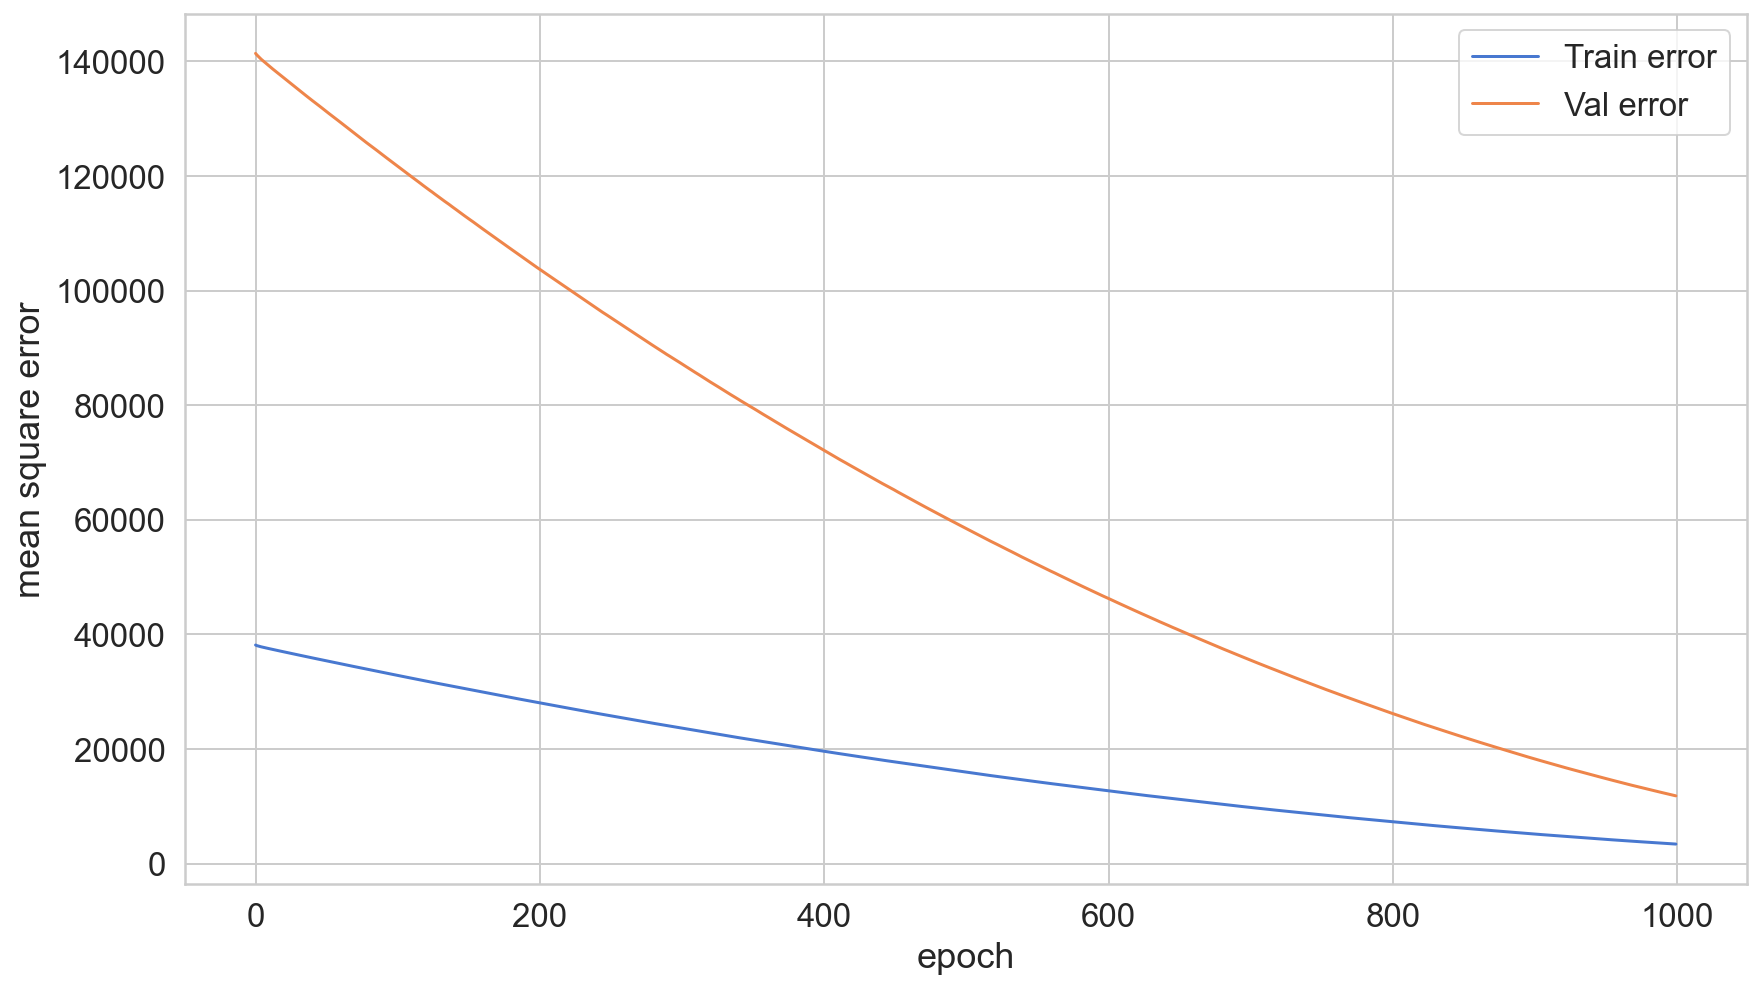

In [69]:
plot_error(history=history)

In [70]:
linear_reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [72]:
weights = linear_reg_model.get_layer("dense").get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]

In [74]:
intercept

2.252416

In [75]:
slope

2.9799125

## Simple NN

In [80]:
def build_nn():
    net = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[1]),
        layers.Dense(16, activation='relu'),
        layers.Dense(1),
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    net.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'accuracy'])

    return net

In [81]:
simple_nn = build_nn()

In [82]:
history = simple_nn.fit(
    x=X, 
    y=y,
    shuffle=True, 
    epochs=1000, 
    validation_split=0.2, 
    verbose=0
)

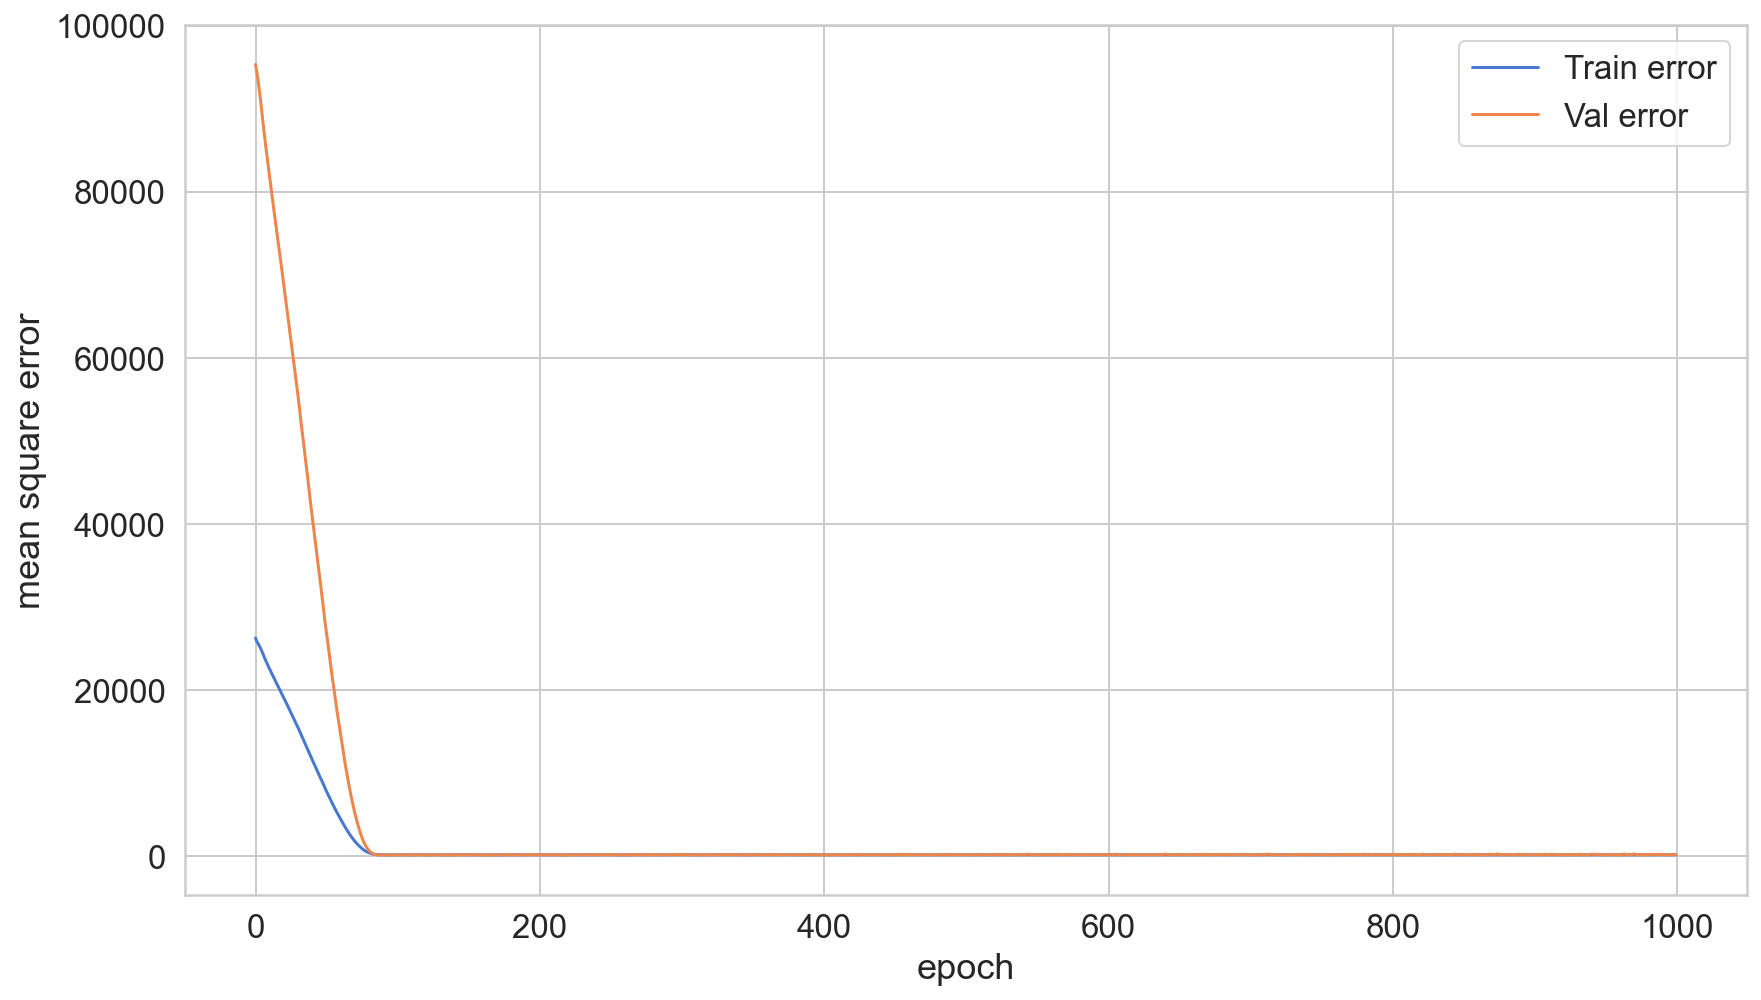

In [83]:
plot_error(history=history)

In [84]:
## Early stopping

In [85]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [86]:
simple_nn = build_nn()
history = simple_nn.fit(
    x=X, 
    y=y,
    shuffle=True, 
    epochs=1000, 
    validation_split=0.2, 
    verbose=0,
    callbacks=early_stop
)

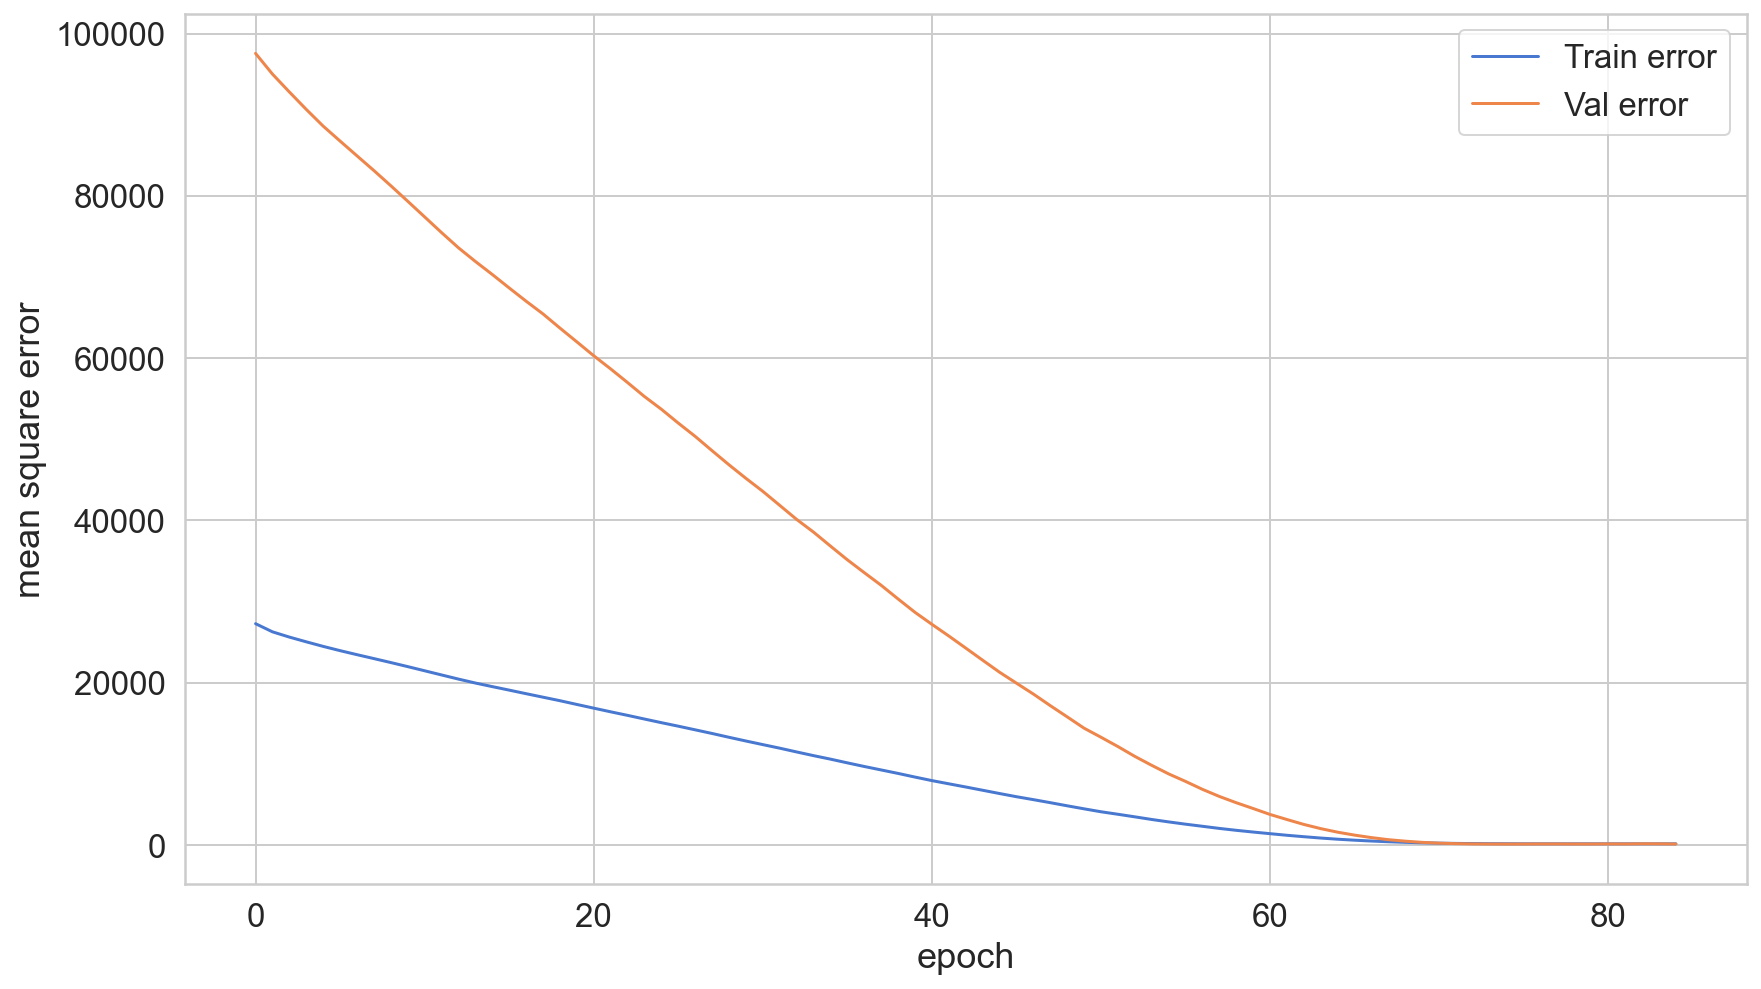

In [87]:
plot_error(history=history)

In [88]:
simple_nn.save('../models/simple_nn.h5')

In [89]:
simple_net = keras.models.load_model('../models/simple_nn.h5')

In [91]:
simple_net.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                64        
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
